In [61]:
import numpy as np
class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter
        
    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
            print(self.w_)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [3]:
import pandas as pd
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header = None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


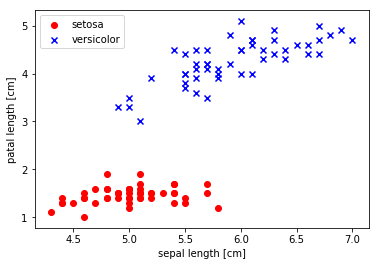

In [4]:
import matplotlib.pyplot as plt
import numpy as np
y = df.iloc[0:100, 4].values
y = np.where(y == "Iris-setosa", -1, 1)
X = df.iloc[0:100, [0, 2]].values
plt.scatter(X[:50, 0], X[:50, 1], color = "red", marker = "o", label = "setosa")
plt.scatter(X[50:100, 0], X[50:100, 1], color = "blue", marker = "x", label = "versicolor")
plt.xlabel("sepal length [cm]")
plt.ylabel("patal length [cm]")
plt.legend(loc = "upper left")
plt.show()

[ 0.    0.38  0.66]
[ 0.    0.76  1.32]
[-0.2   0.22  1.68]
[-0.2   0.34  2.1 ]
[-0.4  -0.68  1.82]
[-0.4  -0.68  1.82]
[-0.4  -0.68  1.82]
[-0.4  -0.68  1.82]
[-0.4  -0.68  1.82]
[-0.4  -0.68  1.82]


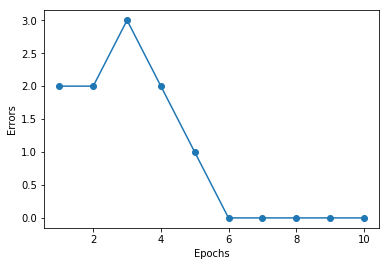

[[ 5.1  1.4]
 [ 4.9  1.4]
 [ 4.7  1.3]
 [ 4.6  1.5]
 [ 5.   1.4]
 [ 5.4  1.7]
 [ 4.6  1.4]
 [ 5.   1.5]
 [ 4.4  1.4]
 [ 4.9  1.5]
 [ 5.4  1.5]
 [ 4.8  1.6]
 [ 4.8  1.4]
 [ 4.3  1.1]
 [ 5.8  1.2]
 [ 5.7  1.5]
 [ 5.4  1.3]
 [ 5.1  1.4]
 [ 5.7  1.7]
 [ 5.1  1.5]
 [ 5.4  1.7]
 [ 5.1  1.5]
 [ 4.6  1. ]
 [ 5.1  1.7]
 [ 4.8  1.9]
 [ 5.   1.6]
 [ 5.   1.6]
 [ 5.2  1.5]
 [ 5.2  1.4]
 [ 4.7  1.6]
 [ 4.8  1.6]
 [ 5.4  1.5]
 [ 5.2  1.5]
 [ 5.5  1.4]
 [ 4.9  1.5]
 [ 5.   1.2]
 [ 5.5  1.3]
 [ 4.9  1.5]
 [ 4.4  1.3]
 [ 5.1  1.5]
 [ 5.   1.3]
 [ 4.5  1.3]
 [ 4.4  1.3]
 [ 5.   1.6]
 [ 5.1  1.9]
 [ 4.8  1.4]
 [ 5.1  1.6]
 [ 4.6  1.4]
 [ 5.3  1.5]
 [ 5.   1.4]
 [ 7.   4.7]
 [ 6.4  4.5]
 [ 6.9  4.9]
 [ 5.5  4. ]
 [ 6.5  4.6]
 [ 5.7  4.5]
 [ 6.3  4.7]
 [ 4.9  3.3]
 [ 6.6  4.6]
 [ 5.2  3.9]
 [ 5.   3.5]
 [ 5.9  4.2]
 [ 6.   4. ]
 [ 6.1  4.7]
 [ 5.6  3.6]
 [ 6.7  4.4]
 [ 5.6  4.5]
 [ 5.8  4.1]
 [ 6.2  4.5]
 [ 5.6  3.9]
 [ 5.9  4.8]
 [ 6.1  4. ]
 [ 6.3  4.9]
 [ 6.1  4.7]
 [ 6.4  4.3]
 [ 6.6  4.4]
 [ 6.8  4.8]

In [64]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker = "o")
plt.xlabel("Epochs")
plt.ylabel("Errors")
plt.show()
print(X)

In [7]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
    markers = ("s", "x", "o", "^", "v")
    colors = ("red", "blue", "lightgreen", "gray", "cyan")
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                                              np.arange(x2_min, x2_max, resolution))
    print(xx1, xx2)
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    print(Z)
    
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl)

[[ 3.3   3.32  3.34 ...,  7.94  7.96  7.98]
 [ 3.3   3.32  3.34 ...,  7.94  7.96  7.98]
 [ 3.3   3.32  3.34 ...,  7.94  7.96  7.98]
 ..., 
 [ 3.3   3.32  3.34 ...,  7.94  7.96  7.98]
 [ 3.3   3.32  3.34 ...,  7.94  7.96  7.98]
 [ 3.3   3.32  3.34 ...,  7.94  7.96  7.98]] [[ 0.    0.    0.   ...,  0.    0.    0.  ]
 [ 0.02  0.02  0.02 ...,  0.02  0.02  0.02]
 [ 0.04  0.04  0.04 ...,  0.04  0.04  0.04]
 ..., 
 [ 6.04  6.04  6.04 ...,  6.04  6.04  6.04]
 [ 6.06  6.06  6.06 ...,  6.06  6.06  6.06]
 [ 6.08  6.08  6.08 ...,  6.08  6.08  6.08]]
[[-1 -1 -1 ..., -1 -1 -1]
 [-1 -1 -1 ..., -1 -1 -1]
 [-1 -1 -1 ..., -1 -1 -1]
 ..., 
 [ 1  1  1 ...,  1  1  1]
 [ 1  1  1 ...,  1  1  1]
 [ 1  1  1 ...,  1  1  1]]


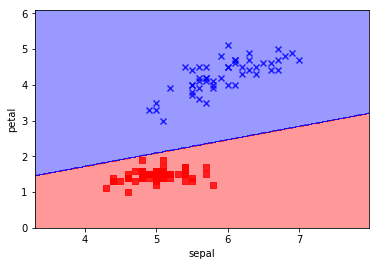

In [57]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel("sepal")
plt.ylabel("petal")

plt.show()

In [83]:
class AdalineGD(object):
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter
        
    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
#             print(y, output)
            
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
#             print(self.w_)
#             print(X.T, errors)
            
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
            
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, X):
        return self.net_input(X)
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

[ 0.       0.02325  0.0699 ]
[[ 5.1  4.9  4.7  4.6  5.   5.4  4.6  5.   4.4  4.9  5.4  4.8  4.8  4.3
   5.8  5.7  5.4  5.1  5.7  5.1  5.4  5.1  4.6  5.1  4.8  5.   5.   5.2
   5.2  4.7  4.8  5.4  5.2  5.5  4.9  5.   5.5  4.9  4.4  5.1  5.   4.5
   4.4  5.   5.1  4.8  5.1  4.6  5.3  5.   7.   6.4  6.9  5.5  6.5  5.7
   6.3  4.9  6.6  5.2  5.   5.9  6.   6.1  5.6  6.7  5.6  5.8  6.2  5.6
   5.9  6.1  6.3  6.1  6.4  6.6  6.8  6.7  6.   5.7  5.5  5.5  5.8  6.   5.4
   6.   6.7  6.3  5.6  5.5  5.5  6.1  5.8  5.   5.6  5.7  5.7  6.2  5.1
   5.7]
 [ 1.4  1.4  1.3  1.5  1.4  1.7  1.4  1.5  1.4  1.5  1.5  1.6  1.4  1.1
   1.2  1.5  1.3  1.4  1.7  1.5  1.7  1.5  1.   1.7  1.9  1.6  1.6  1.5
   1.4  1.6  1.6  1.5  1.5  1.4  1.5  1.2  1.3  1.5  1.3  1.5  1.3  1.3
   1.3  1.6  1.9  1.4  1.6  1.4  1.5  1.4  4.7  4.5  4.9  4.   4.6  4.5
   4.7  3.3  4.6  3.9  3.5  4.2  4.   4.7  3.6  4.4  4.5  4.1  4.5  3.9
   4.8  4.   4.9  4.7  4.3  4.4  4.8  5.   4.5  3.5  3.8  3.7  3.9  5.1
   4.5  4.5  4.7  4.4 

   4.1]] [-1.04758407 -1.04938698 -1.04398847 -1.05929275 -1.04848553 -1.06648397
 -1.05209134 -1.05568694 -1.05389424 -1.0565884  -1.05208113 -1.06469127
 -1.05028843 -1.03319144 -1.02687107 -1.04937678 -1.0376783  -1.04758407
 -1.06377961 -1.05478549 -1.06648397 -1.05478549 -1.02328566 -1.06918833
 -1.08629552 -1.06288836 -1.06288836 -1.05388404 -1.04668262 -1.06559272
 -1.06469127 -1.05208113 -1.05388404 -1.04397826 -1.0565884  -1.03408269
 -1.03677685 -1.0565884  -1.04669282 -1.05478549 -1.04128411 -1.04579137
 -1.04669282 -1.06288836 -1.08359116 -1.05028843 -1.06198691 -1.05209134
 -1.05298259 -1.04848553  0.73189673  0.74089085  0.71659244  0.76878487
  0.73459089  0.73458068  0.72558656  0.81378608  0.73549234  0.77328193
  0.8002847   0.75798784  0.77329213  0.72378366  0.79849199  0.75079663
  0.73367923  0.76428781  0.73908795  0.77688774  0.71477933  0.77419358
  0.71118373  0.72378366  0.75529369  0.74989517  0.72289241  0.70758812
  0.73728504  0.80659486  0.7831877   0.79

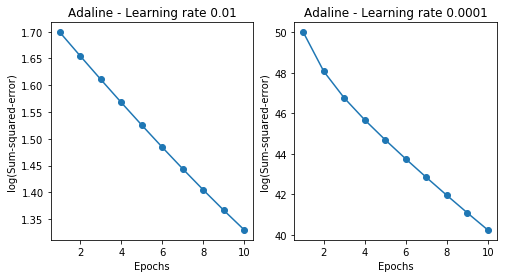

In [80]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (8, 4))

ada1 = AdalineGD(n_iter = 10, eta = 0.0005).fit(X, y)

ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker = "o")

ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("log(Sum-squared-error)")

ax[0].set_title("Adaline - Learning rate 0.01")


ada2 = AdalineGD(n_iter = 10, eta = 0.0001).fit(X, y)

ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker = "o")

ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("log(Sum-squared-error)")

ax[1].set_title("Adaline - Learning rate 0.0001")

plt.show()

In [5]:
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

ada = AdalineGD(n_iter = 30, eta = 0.01)
ada.fit(X_std, y)
plot_decision_regions(X_std, y, classifier = ada)
plt.title("Adaline - GD")
plt.xlabel("sepal (standardized)")
plt.ylabel("petal (standardized)")
plt.show()
plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker = "o")
plt.xlabel("Epochs")
plt.ylabel("Sum-squared-error")
plt.show()

NameError: name 'AdalineGD' is not defined

In [11]:
from numpy.random import seed
class AdalineSGD(object):
    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        if random_state:
            seed(random_state)
            
    def fit(self, X, y):
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            
            if self.shuffle:
                X, y = self._shuffle(X, y)
                
            cost = []
            
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))
                
            avg_cost = sum(cost)/len(y)
            self.cost_.append(avg_cost)
            
        return self
    
    def partial_fit(self, X, y):
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
            
        if y.ravel().shape[0] > 1:
            for xi, target in zip (X, y):
                self._update_weights(xi, targets)
        else:
            self._update_weights(X, y)
        return self
    
    def _shuffle(self, X, y):
        r = np.random.permutation(len(y))
        return X[r], y[r]

    def _initialize_weights(self, m):
        self.w_ = np.zeros(1 + m)
        self.w_initialized = True
        
    def _update_weights(self, xi, target):
        output = self.net_input(xi)
        error = (target - output)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error**2
        return cost
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, X):
        return self.net_input(X)
    
    def predict(self, X):
        return np.where(self.activation(X) >= 0.0, 1, -1)

[[-2.8340382 -2.8140382 -2.7940382 ...,  3.3459618  3.3659618  3.3859618]
 [-2.8340382 -2.8140382 -2.7940382 ...,  3.3459618  3.3659618  3.3859618]
 [-2.8340382 -2.8140382 -2.7940382 ...,  3.3459618  3.3659618  3.3859618]
 ..., 
 [-2.8340382 -2.8140382 -2.7940382 ...,  3.3459618  3.3659618  3.3859618]
 [-2.8340382 -2.8140382 -2.7940382 ...,  3.3459618  3.3659618  3.3859618]
 [-2.8340382 -2.8140382 -2.7940382 ...,  3.3459618  3.3659618  3.3859618]] [[-2.29188606 -2.29188606 -2.29188606 ..., -2.29188606 -2.29188606
  -2.29188606]
 [-2.27188606 -2.27188606 -2.27188606 ..., -2.27188606 -2.27188606
  -2.27188606]
 [-2.25188606 -2.25188606 -2.25188606 ..., -2.25188606 -2.25188606
  -2.25188606]
 ..., 
 [ 2.50811394  2.50811394  2.50811394 ...,  2.50811394  2.50811394
   2.50811394]
 [ 2.52811394  2.52811394  2.52811394 ...,  2.52811394  2.52811394
   2.52811394]
 [ 2.54811394  2.54811394  2.54811394 ...,  2.54811394  2.54811394
   2.54811394]]
[[-1 -1 -1 ..., -1 -1 -1]
 [-1 -1 -1 ..., -1 -1 

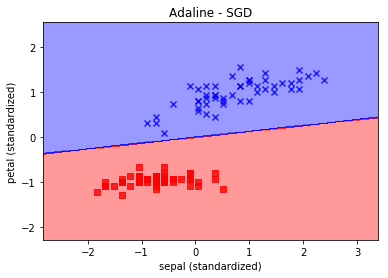

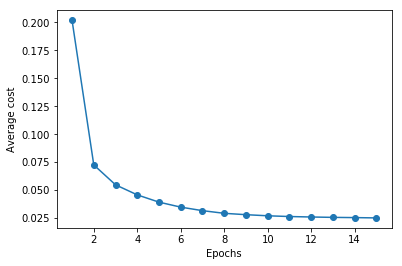

In [12]:
ada = AdalineSGD(n_iter = 15, eta = 0.01, random_state=1)
ada.fit(X_std, y)
plot_decision_regions(X_std, y, classifier = ada)
plt.title("Adaline - SGD")
plt.xlabel("sepal (standardized)")
plt.ylabel("petal (standardized)")
plt.show()
plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker = "o")
plt.xlabel("Epochs")
plt.ylabel("Average cost")
plt.show()